# Rotating edge experiment

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import itertools
import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
from lineart import style, transform, draw
from lineart.primatives import EdgeCollection
from lineart.shapes import octahedron

In [5]:
e = np.array([[0, 0, 0], [1, 1, 0]])
p = np.array([0, 1, 0])
o = np.array([0, 0, 0])
edges = np.array([e, e, e])
points = np.array([p, p])

In [6]:
edges

array([[[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]]])

## split edges

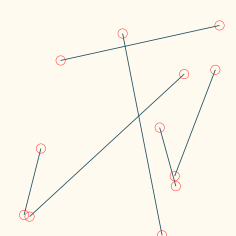

In [7]:
edges = np.random.rand(6, 2, 3) * 100
Image(draw.quick_draw_edges(edges, v=True).image(kind="rgba", ppi=60).png())

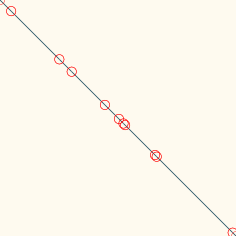

In [8]:
splits = transform.rand_split_edge(e * 100, 10)

Image(draw.quick_draw_edges(splits, v=True).image(kind="rgba", ppi=60).png())

### Edge collecion rotation and velocity

In [9]:
split_collection = EdgeCollection(
    splits,
)

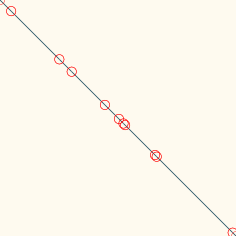

In [10]:
Image(
    draw.quick_draw_edges(split_collection.edges, v=True)
    .image(kind="rgba", ppi=60)
    .png()
)

In [11]:
c = np.repeat(split_collection.centers[:, np.newaxis, :], 2, axis=1)

In [12]:
split_collection.n

11

In [13]:
split_collection.velocities, split_collection.angular_velocities

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10],
        [1.e-10, 1.e-10, 1.e-10]]))

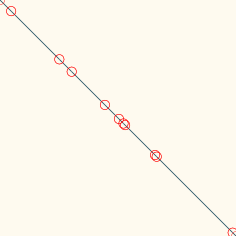

In [14]:
split_collection.step(1)
# split_collection.rotate_indiv(np.pi/50)
Image(
    draw.quick_draw_edges(split_collection.edges, v=True)
    .image(kind="rgba", ppi=60)
    .png()
)

### Edge collecion zero movement values

In [15]:
split_collection = EdgeCollection(
    splits,
)

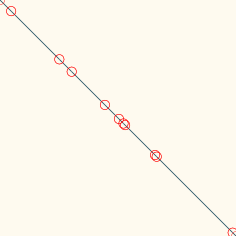

In [16]:
Image(
    draw.quick_draw_edges(split_collection.edges, v=True)
    .image(kind="rgba", ppi=60)
    .png()
)

In [17]:
split_collection.angular_velocities

array([[1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10]])

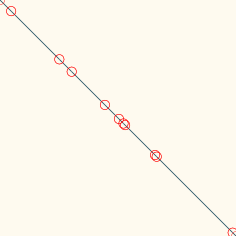

In [18]:
split_collection.step(1)
# split_collection.rotate_indiv(np.pi/50)`
Image(
    draw.quick_draw_edges(split_collection.edges, v=True)
    .image(kind="rgba", ppi=60)
    .png()
)

In [19]:
split_collection

EdgeCollection at: object.__repr__(self)
self.edges.shape=(11, 2, 3)
self.centers.mean(axis=0)=array([ 4.91490687e+01,  4.91490687e+01, -1.36112359e-28])self.lengths (min, mean, max) : (0.98, 12.86, 45.50)

### Octahedron test

In [20]:
ec = octahedron(np.array([50, 50, 40]), 47)

In [21]:
ec

EdgeCollection at: object.__repr__(self)
self.edges.shape=(12, 2, 3)
self.centers.mean(axis=0)=array([50., 50., 40.])self.lengths (min, mean, max) : (66.47, 66.47, 66.47)

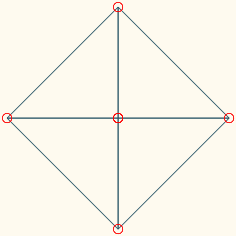

In [22]:
Image(draw.quick_draw_edges(ec.edges, v=True).image(kind="rgba", ppi=60).png())

In [23]:
ec.rotate_unison(np.array([[50, 50, 40]]), np.array([1, 1, 1]), np.pi * 2 / 20)

EdgeCollection at: object.__repr__(self)
self.edges.shape=(12, 2, 3)
self.centers.mean(axis=0)=array([50., 50., 40.])self.lengths (min, mean, max) : (66.47, 66.47, 66.47)

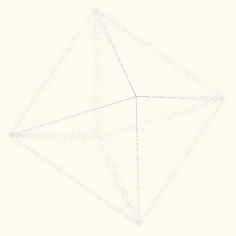

In [24]:
Image(
    draw.quick_draw_zsampled_edges(ec.edges, n=1000, scatter=0.01)
    .image(kind="rgba", ppi=60)
    .png()
)

### Tiling code

In [25]:
ec = octahedron(np.array([50, 50, 40]), 42)

In [26]:
ec.edges[:, :, :-1].shape

(12, 2, 2)

In [27]:
for e in ec.edges[:, :, :-1] + np.array([100, 100]):
    print(*e.flatten())

150 192 108 150
150 192 150 150
150 192 192 150
150 192 150 150
150 108 108 150
150 108 150 150
150 108 192 150
150 108 150 150
108 150 150 150
150 150 192 150
192 150 150 150
150 150 108 150


In [28]:
tiled_page = draw.setup_tiled_page(n_cols=5, n_rows=5)

In [29]:
for d in range(20):  # increase above one to overlay tiling
    for i, j in itertools.product(range(5), repeat=2):

        draw.draw_edges_on_tile(ec.edges, i, j, tile_size=100, page=tiled_page, v=False)
        ec.rotate_unison(
            np.array([[50, 50, 40]]), np.array([d * 0.05, d * 0.05, 1]), np.pi * 2 / 24
        )

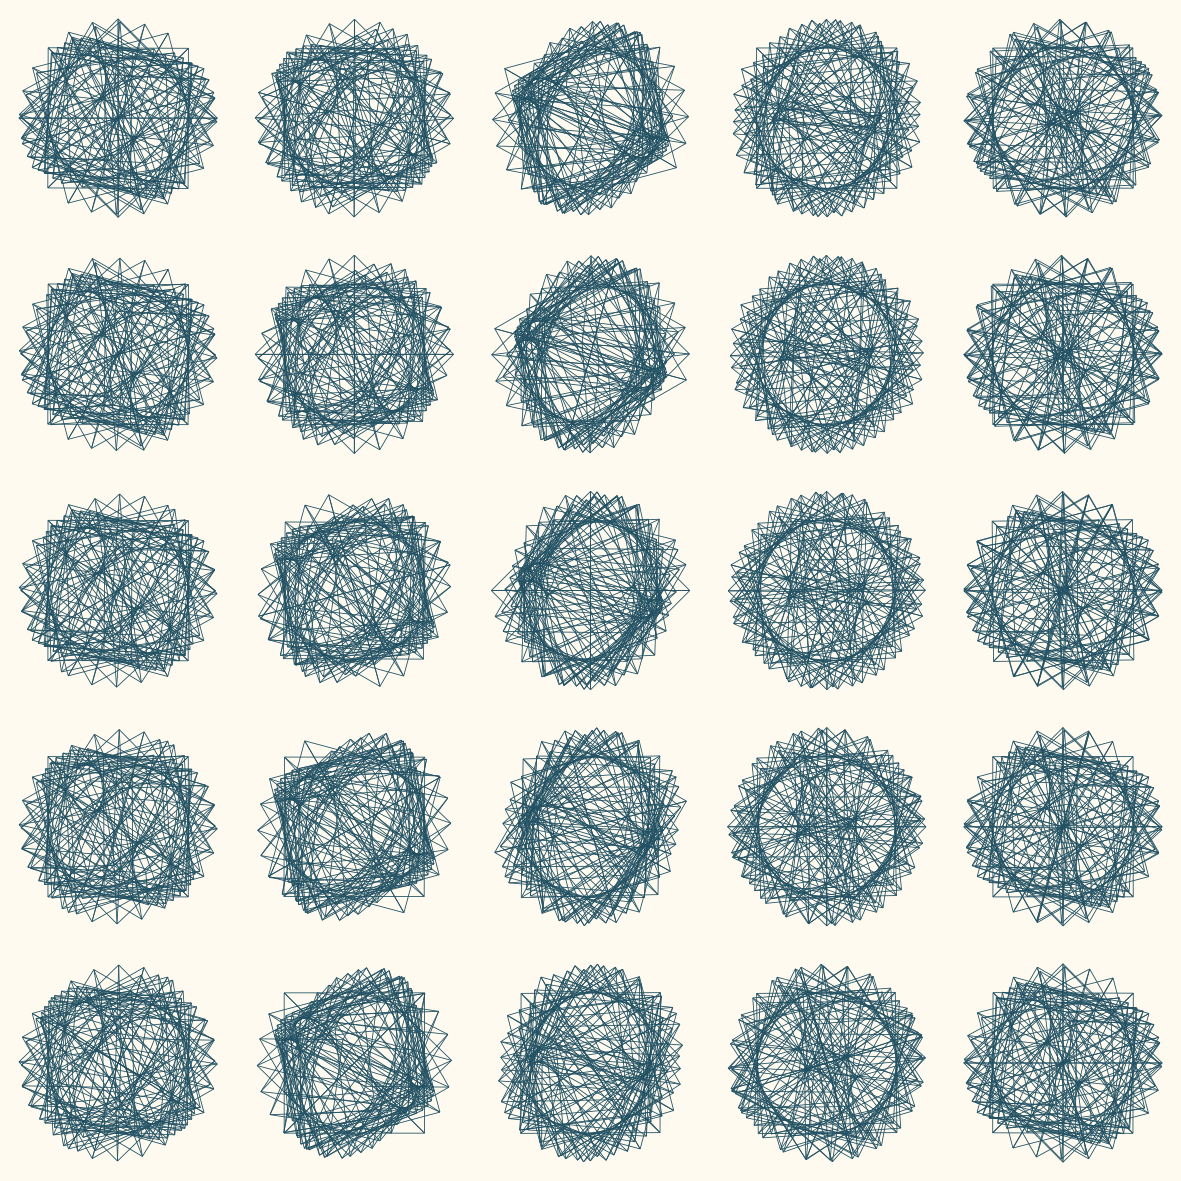

In [30]:
Image(tiled_page.image(kind="rgba", ppi=60).png())

## octahedron Push test

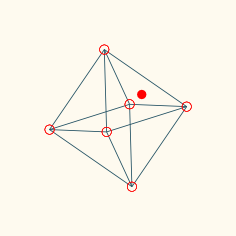

In [31]:
ec = octahedron(np.array([50, 50, 40]), 30)
ec.rotate_unison(np.array([[50, 50, 40]]), np.array([1, 1, 1]), np.pi * 2 / 20)
page = draw.quick_draw_edges(ec.edges, v=True)
page.place(style.full_red.circle(*[60, 40], 2))
Image(page.image(kind="rgba", ppi=60).png())

In [32]:
transform.point_push(ec, 10, np.array([[60, 40, 0]]))

EdgeCollection at: object.__repr__(self)
self.edges.shape=(12, 2, 3)
self.centers.mean(axis=0)=array([50., 50., 40.])self.lengths (min, mean, max) : (42.43, 42.43, 42.43)

In [33]:
# Image(draw.quick_draw_zsampled_edges(ec.edges, n=1000, scatter=0.005).image(kind="rgba", ppi=60).png())

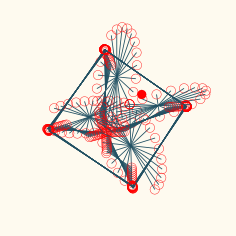

In [34]:
for i in range(10):
    ec.step(10)
    page = draw.quick_draw_edges(ec.edges, v=True, page=page)
Image(page.image(kind="rgba", ppi=60).png())

### dodecahedron

In [35]:
page = draw.make_page(100)

In [36]:
r = (1 + 5**0.5) / 2

points = np.array(
    [
        [-1.0, r, 0.0],
        [1.0, r, 0.0],
        [-1.0, -r, 0.0],
        [1.0, -r, 0.0],
        [0.0, -1.0, r],
        [0.0, 1.0, r],
        [0.0, -1.0, -r],
        [0.0, 1.0, -r],
        [r, 0.0, -1.0],
        [r, 0.0, 1.0],
        [-r, 0.0, -1.0],
        [-r, 0.0, 1.0],
    ],
    dtype=float,
) * 10 + np.array([[50, 50, 0]])

faces = np.array(
    [
        [0, 11, 5],
        [0, 5, 1],
        [0, 1, 7],
        [0, 7, 10],
        [0, 10, 11],
        [1, 5, 9],
        [5, 11, 4],
        [11, 10, 2],
        [10, 7, 6],
        [7, 1, 8],
        [3, 9, 4],
        [3, 4, 2],
        [3, 2, 6],
        [3, 6, 8],
        [3, 8, 9],
        [5, 4, 9],
        [2, 4, 11],
        [6, 2, 10],
        [8, 6, 7],
        [9, 8, 1],
    ]
)

edge_indices = np.array([list(itertools.combinations(f, 2)) for f in faces]).reshape(
    -1, 2
)

edges = np.array([[points[i], points[j]] for i, j in edge_indices])

In [37]:
ec = EdgeCollection(edges)

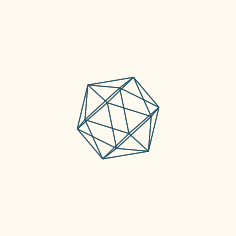

In [38]:
ec.rotate_unison(np.array([[50, 50, 0]]), np.array([1, 1, 1]), np.pi * 2 / 20)
page = draw.quick_draw_edges(ec.edges, v=False)

Image(page.image(kind="rgba", ppi=60).png())

In [39]:
x = page.svg("dodecahedron.svg")

### Shattered single line

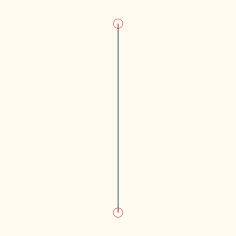

In [40]:
e_prime = EdgeCollection(np.array([[[50, 10, 0], [50, 90, 0]]]))
page = draw.quick_draw_edges(e_prime.edges, v=True)
Image(page.image(kind="rgba", ppi=60).png())

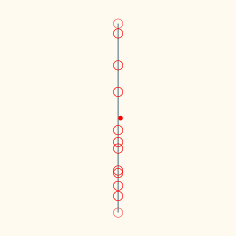

In [41]:
e_split = EdgeCollection(transform.rand_split_edge(e_prime.edges[0], 10))
push_point = [51, 50, 0]
transform.point_push(e_split, 10, np.array([push_point]), lin_scale=100, rot_scale=1)
page = draw.quick_draw_edges(e_split.edges, v=True)
page.place(style.full_red.circle(*push_point[:2], 1))
Image(page.image(kind="rgba", ppi=60).png())

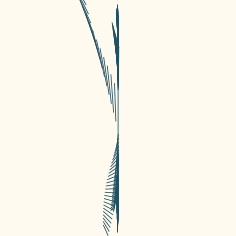

In [42]:
ec = e_split.copy()
page = draw.quick_draw_edges(ec.edges, v=False)

for i in range(25):
    ec.step(1)
    draw.quick_draw_edges(ec.edges, v=False, page=page)

Image(page.image(kind="rgba", ppi=60).png())

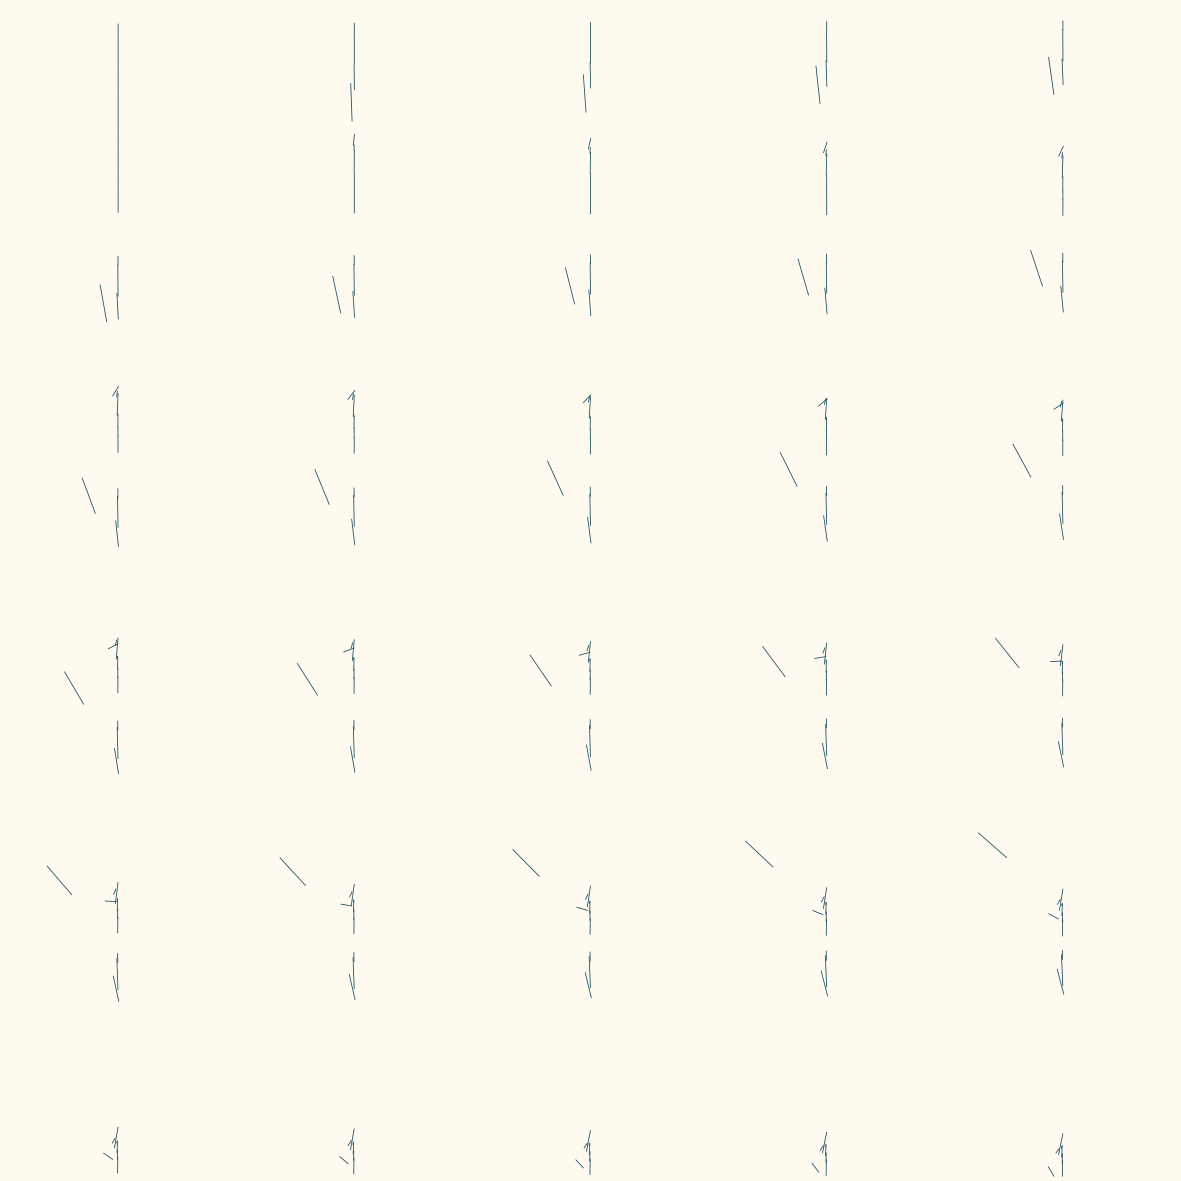

In [43]:
tiled_page = draw.setup_tiled_page(n_cols=5, n_rows=5)
ec = e_split.copy()
for i, j in itertools.product(range(5), repeat=2):

    draw.draw_edges_on_tile(ec.edges, j, i, tile_size=100, page=tiled_page, v=False)
    ec.step(1)
Image(tiled_page.image(kind="rgba", ppi=60).png())

### Shattered stacked line

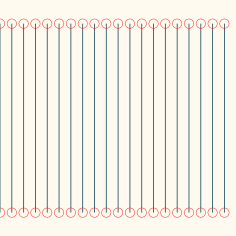

In [48]:
edges = np.array([[[x * 5, 10, 0], [x * 5, 90, 0]] for x in range(20)])

e_prime = EdgeCollection(edges)
page = draw.quick_draw_edges(e_prime.edges, v=True)
Image(page.image(kind="rgba", ppi=60).png())

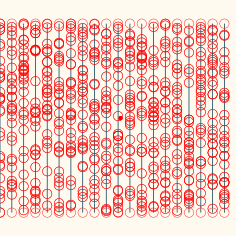

In [50]:
e_split = EdgeCollection(transform.rand_split_edge(e_prime.edges[0], 30))
for e in e_prime.edges[1:]:
    e_split = e_split.combine(EdgeCollection(transform.rand_split_edge(e, 30)))
push_point = [51, 50, 0]
transform.point_push(e_split, 10, np.array([push_point]), lin_scale=100, rot_scale=1)
page = draw.quick_draw_edges(e_split.edges, v=True)
page.place(style.full_red.circle(*push_point[:2], 1))
Image(page.image(kind="rgba", ppi=60).png())

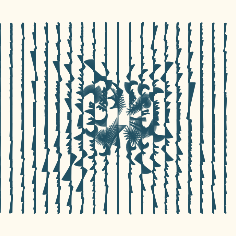

In [51]:
ec = e_split.copy()
page = draw.quick_draw_edges(ec.edges, v=False)

for i in range(25):
    ec.step(1)
    draw.quick_draw_edges(ec.edges, v=False, page=page)

Image(page.image(kind="rgba", ppi=60).png())

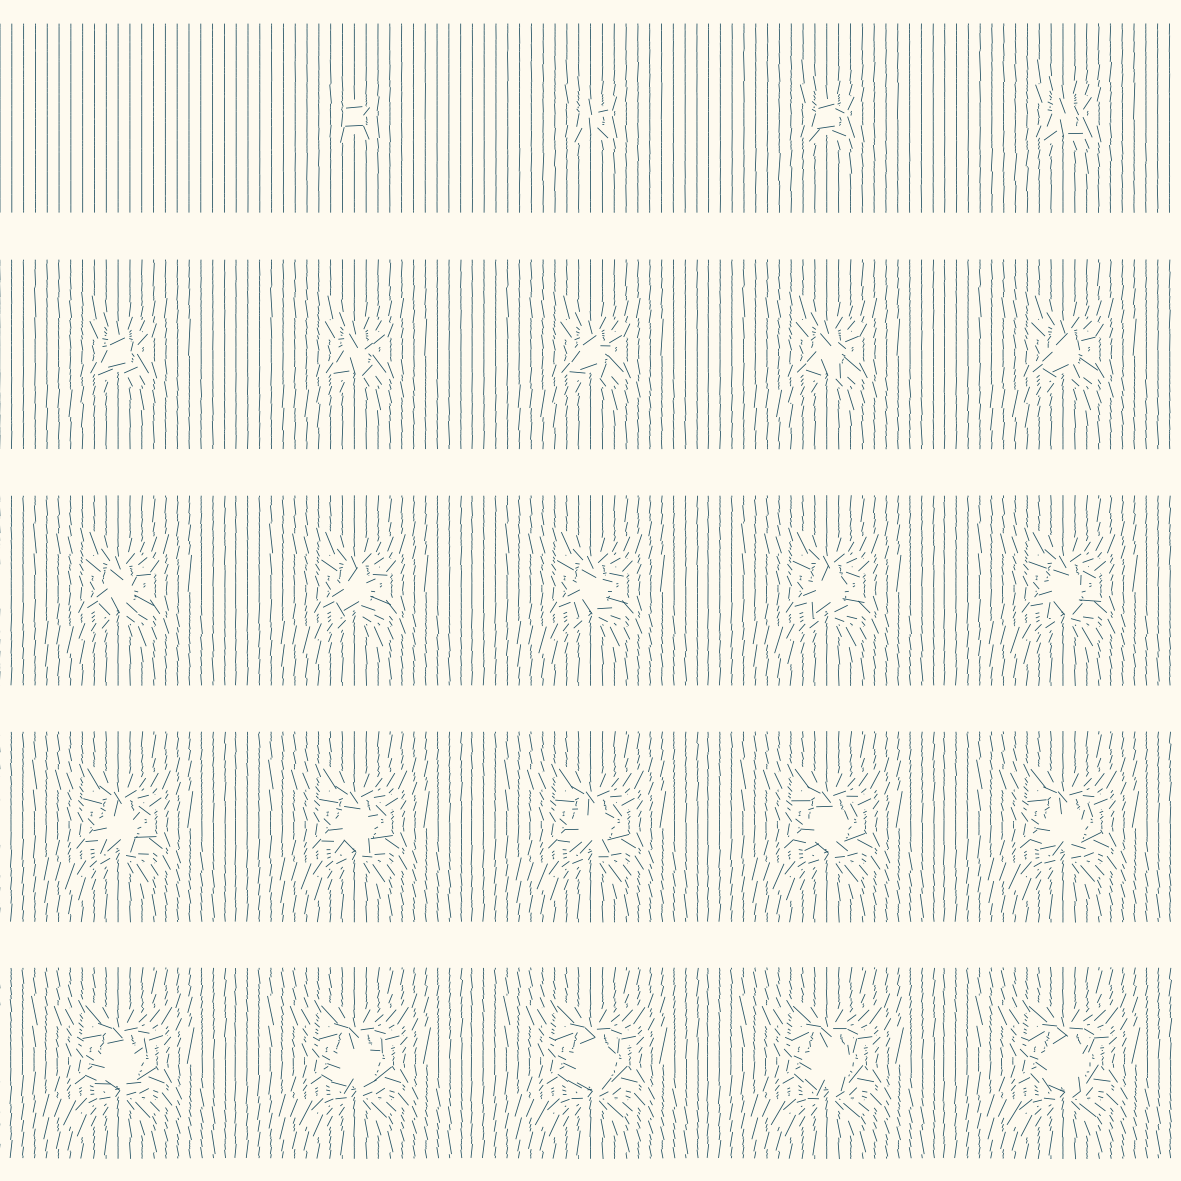

In [52]:
tiled_page = draw.setup_tiled_page(n_cols=5, n_rows=5)
ec = e_split.copy()
for i, j in itertools.product(range(5), repeat=2):

    draw.draw_edges_on_tile(ec.edges, j, i, tile_size=100, page=tiled_page, v=False)
    ec.step(1)
Image(tiled_page.image(kind="rgba", ppi=60).png())

In [ ]:
tiled_page